In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename = 'ocean_cobalt_omip_tracers_month_z.089101-089512.phyc.nc'

In [4]:
phytoplankton = xr.open_dataset(rootdir+datadir+filename)
print(phytoplankton)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0891-01-16 12:00:00 ... 0895-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    phyc        (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z.089101-089512.phyc.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 08910101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A


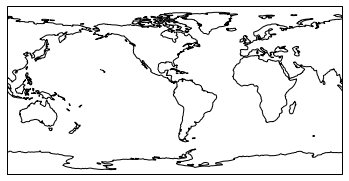

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

## This is how you import cartopy! It's for "better" looking maps! 
# You can also make the Pacific Ocean the center by using this longitude value

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=1000.0,globe=None))
ax.coastlines()

plt.show()

# To save the plot:
#plt.savefig('coastlines.pdf')
#plt.savefig('coastlines.png')

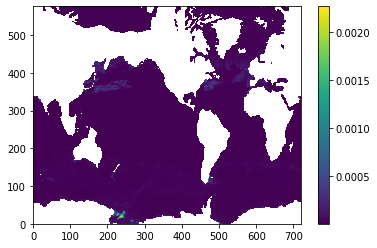

In [6]:
## My attempt to make a "not-so-pretty" plot with phytoplankton
# This is Graeme's way of making a color map 


im = plt.pcolormesh(phytoplankton.phyc.isel(time=0,z_l=9))
plt.colorbar(im)
plt.show()


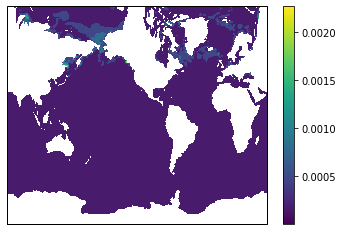

In [7]:
import cartopy.crs as ccrs


ax = plt.axes(projection=ccrs.Mercator(central_longitude=0.0,min_latitude=-80.0,max_latitude=84.0,globe=None,latitude_true_scale=0.0))

## pretty plot code has been figured outttttttttt! ^^^ 
## This will align the "pretty" plot in the "not-so-pretty" plot 
## This plot is WAY more defined (you can see this in the Bering Strait, Europe, and Oceania!)

plt.contourf(phytoplankton.phyc.isel(time=5,z_l=0))
plt.colorbar(im)

ax.coastlines()


plt.show()



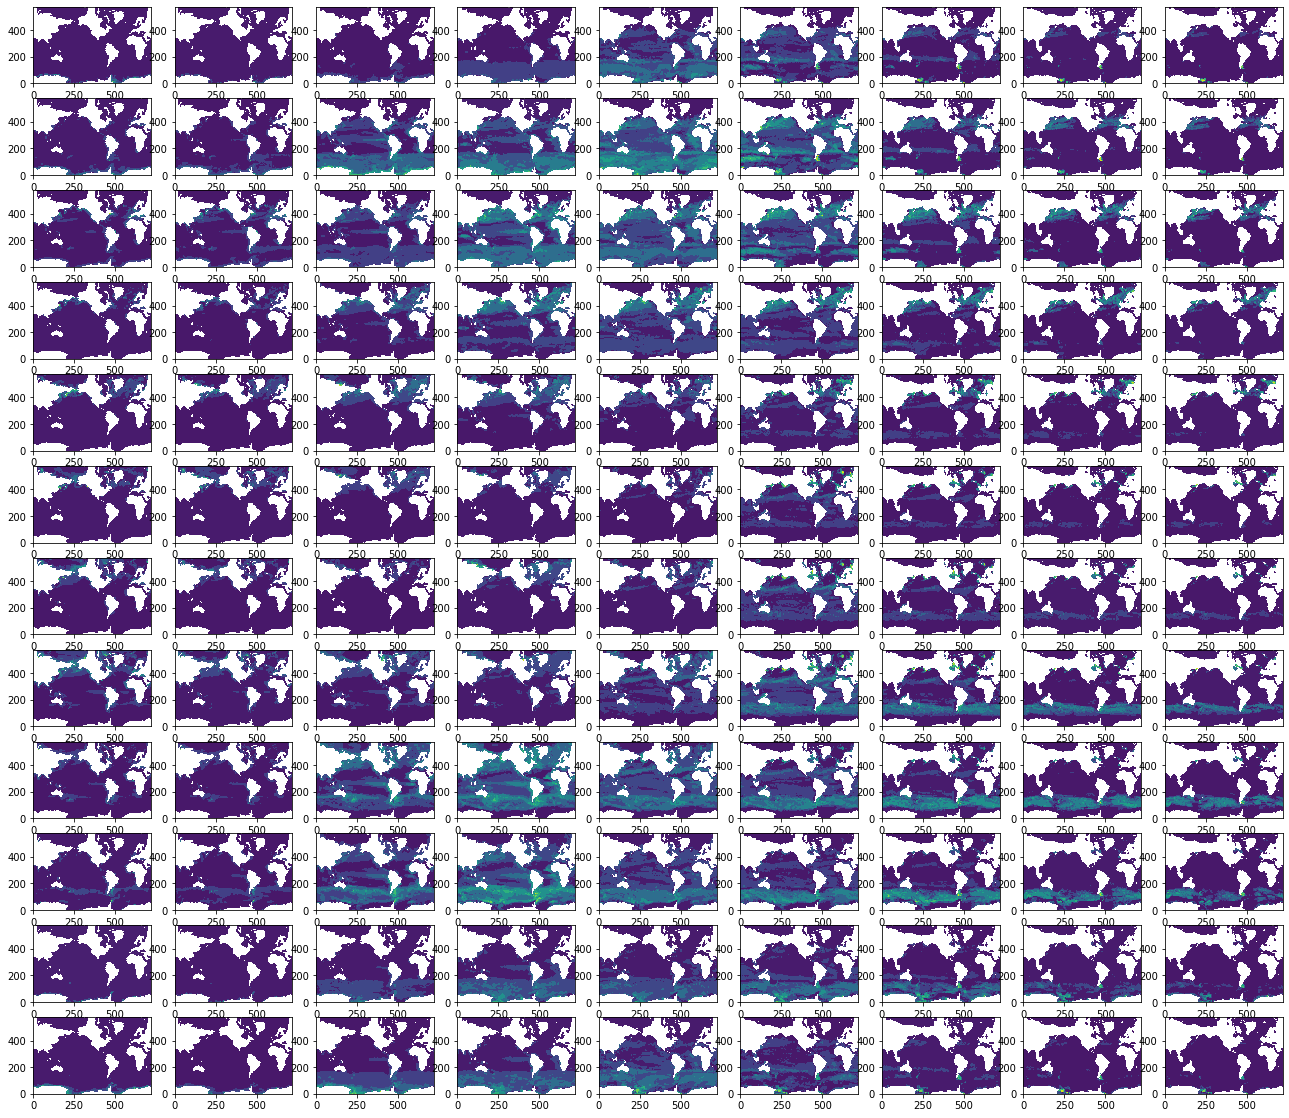

In [8]:
## Code for making a loop with these graphs :)! 
# Remember, this is phytoplankton growth over the course of a year 

plt.figure(figsize=(30,20))
for z in range(9):
    for t in range(12):
        n=t*12+z
        plt.subplot(12,12,n+1)
        plt.contourf(phytoplankton.phyc.isel(time=t,z_l=z))
        plt.colorbar()
        
        

## Some interesting things about this plot:
# Between depths 3 and 6, there seems to be a 'breathing' effect going on (sort of how leaves grow and die between seasons!)
        

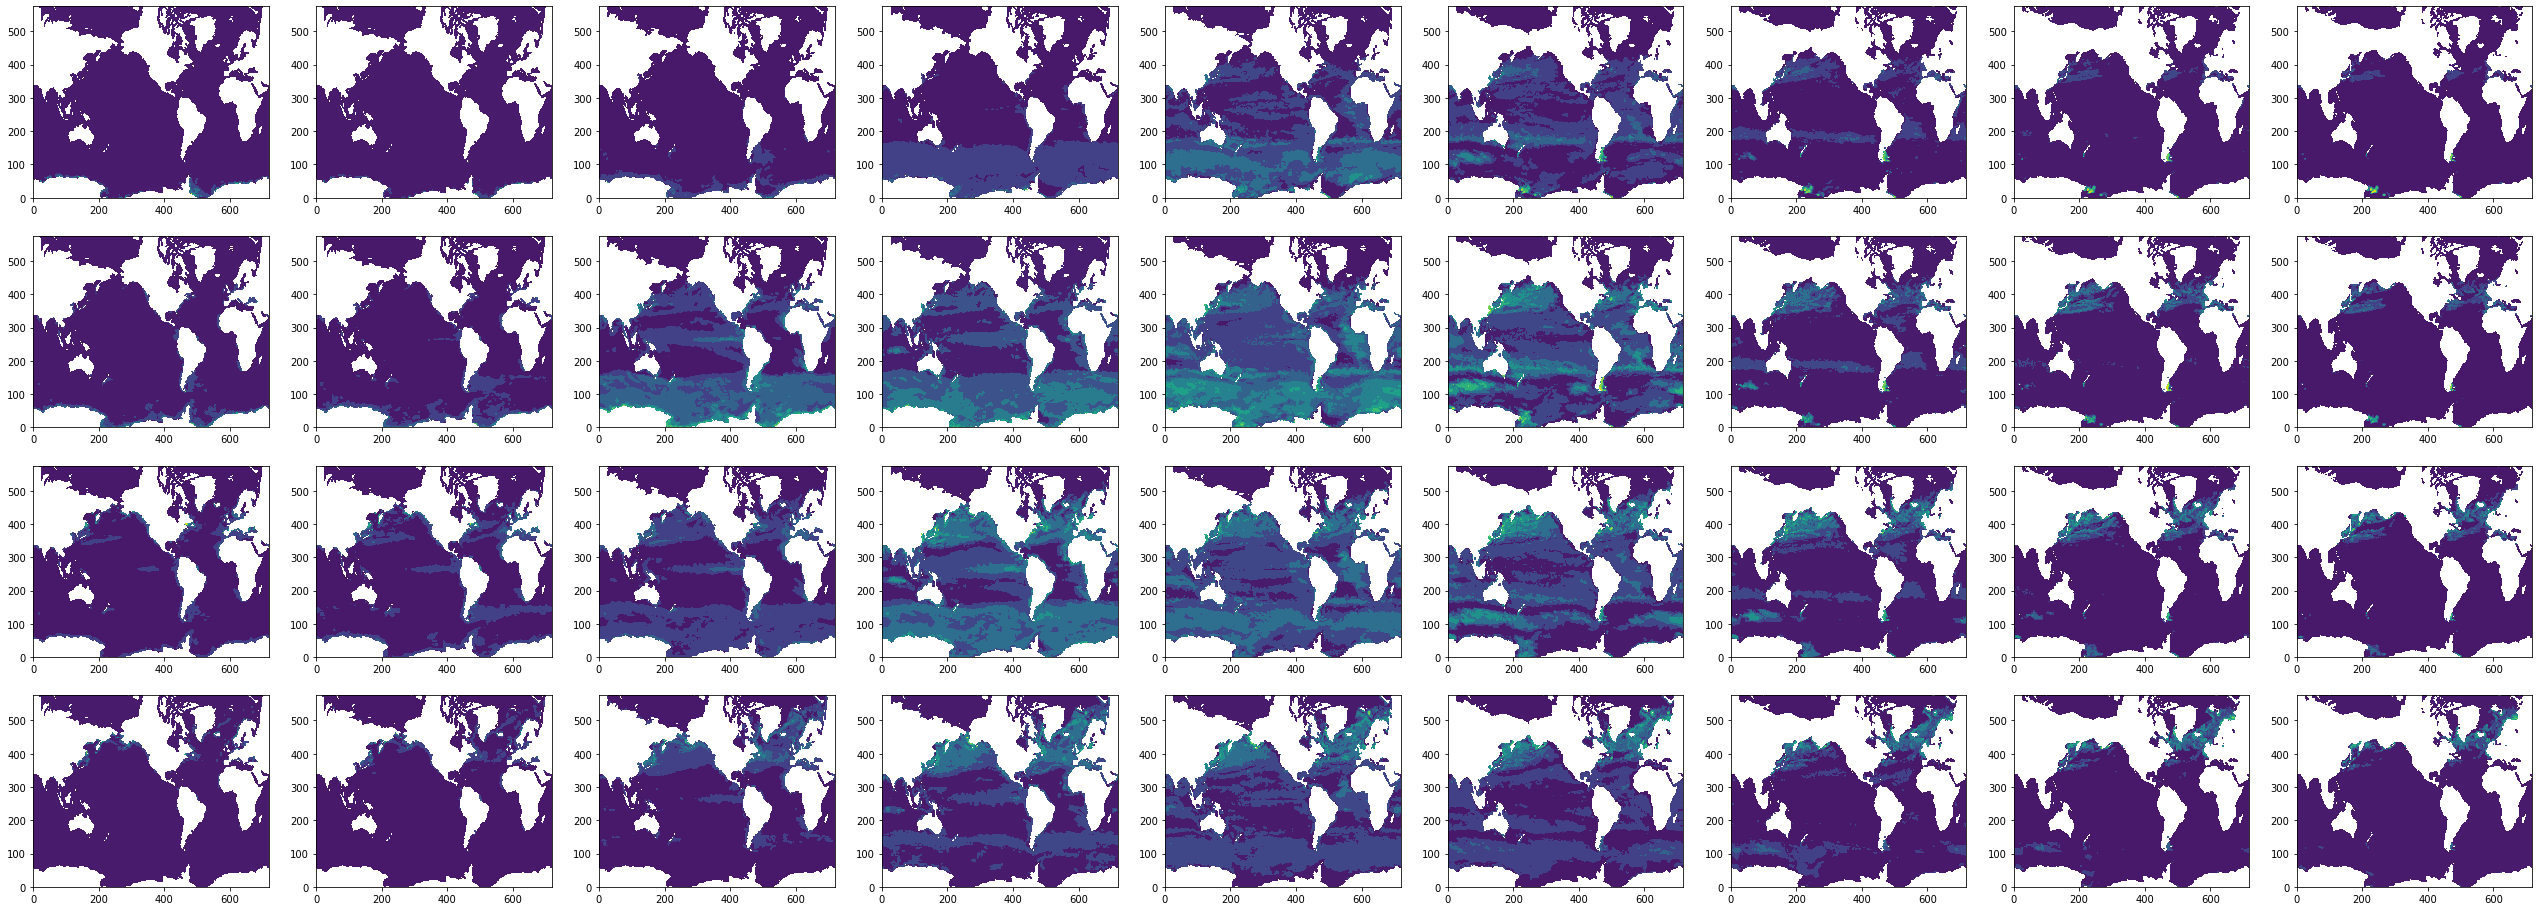

In [36]:
## Phytoplankton growth in the winter months 

plt.figure(figsize=(60,50))
for z in range(9):
    winter_months = [12, 13, 14, 15]
    for t in range(len(winter_months)):
        n=t*12+z
        plt.subplot(12,12,n+1)
        plt.contourf(phytoplankton.phyc.isel(time=t,z_l=z))
        